Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [intercept]


/Users/vishalivallioor/anaconda3/envs/pymc_env/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 0 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


array([<Axes: title={'center': 'intercept'}>,
       <Axes: title={'center': 'p'}>], dtype=object)

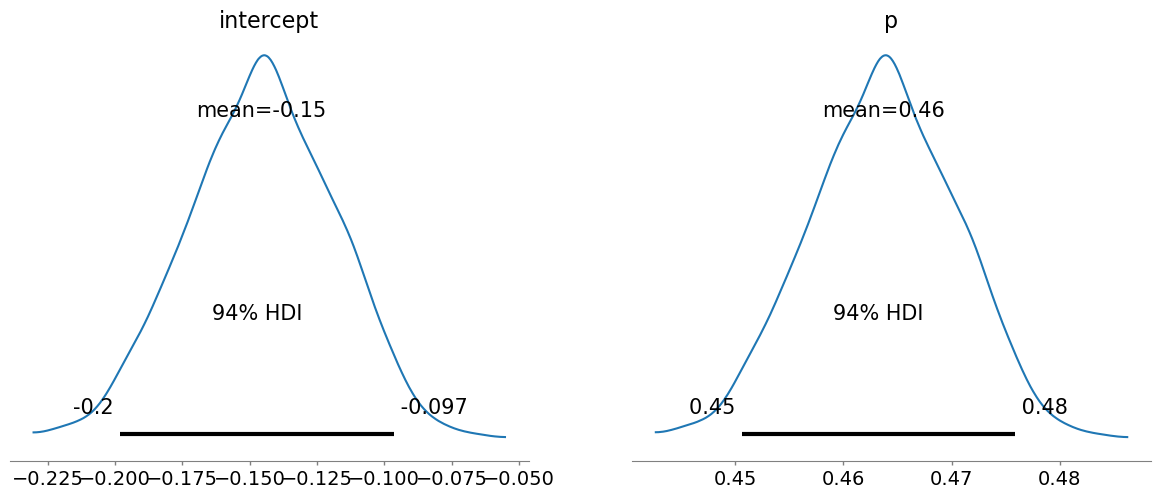

In [2]:
import pandas as pd
import pymc as pm
import numpy as np

# Load data
df = pd.read_csv("drone_airspace_data.csv")

# Create binary target
df['in_class_b'] = df['airspace_name'].apply(lambda x: 1 if isinstance(x, str) and 'CLASS B' in x else 0)

# Simple Bayesian Logistic Regression
with pm.Model() as model:
    # Priors
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    # You can add more predictors (state, altitude, etc.) later
    # Likelihood
    p = pm.Deterministic('p', pm.math.sigmoid(intercept))
    observed = pm.Bernoulli('observed', p=p, observed=df['in_class_b'])
    
    # Sampling
    trace = pm.sample(1000, tune=1000, chains=2)

# Analyze posterior
pm.summary(trace)
pm.plot_posterior(trace, var_names=["intercept", "p"])

In [3]:
def classify_airspace(x):
    if isinstance(x, str):
        if 'CLASS B' in x:
            return 'Class B'
        elif 'CLASS C' in x:
            return 'Class C'
        elif 'CLASS D' in x:
            return 'Class D'
        else:
            return 'Other'
    else:
        return 'Unknown'

df['airspace_class'] = df['airspace_name'].apply(classify_airspace)

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu_alpha, sigma_alpha, alpha]


/Users/vishalivallioor/anaconda3/envs/pymc_env/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 18 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
/Users/vishalivallioor/anaconda3/envs/pymc_env/lib/python3.12/site-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (60) in plot_posterior, generating only 40 plots
  warnings.warn(


              mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
mu_alpha    -0.885  0.183  -1.230   -0.541      0.004    0.004    2094.0   
sigma_alpha  1.170  0.154   0.898    1.454      0.004    0.003    1569.0   
alpha[0]    -0.903  0.197  -1.260   -0.517      0.003    0.005    4259.0   
alpha[1]    -0.988  0.470  -1.857   -0.121      0.008    0.013    3519.0   
alpha[2]     0.042  0.189  -0.299    0.407      0.003    0.005    4575.0   
...            ...    ...     ...      ...        ...      ...       ...   
alpha[55]   -2.015  0.844  -3.575   -0.470      0.016    0.021    2901.0   
alpha[56]   -1.232  1.086  -3.317    0.674      0.018    0.033    3521.0   
alpha[57]   -1.243  1.092  -3.234    0.869      0.017    0.026    4101.0   
alpha[58]   -1.265  1.125  -3.452    0.728      0.019    0.031    4105.0   
alpha[59]   -0.416  0.753  -1.890    0.940      0.012    0.019    3728.0   

             ess_tail  r_hat  
mu_alpha       1818.0    1.0  
sigma_alpha    1451.0    

array([[<Axes: title={'center': 'alpha\n0'}>,
        <Axes: title={'center': 'alpha\n1'}>,
        <Axes: title={'center': 'alpha\n2'}>,
        <Axes: title={'center': 'alpha\n3'}>],
       [<Axes: title={'center': 'alpha\n4'}>,
        <Axes: title={'center': 'alpha\n5'}>,
        <Axes: title={'center': 'alpha\n6'}>,
        <Axes: title={'center': 'alpha\n7'}>],
       [<Axes: title={'center': 'alpha\n8'}>,
        <Axes: title={'center': 'alpha\n9'}>,
        <Axes: title={'center': 'alpha\n10'}>,
        <Axes: title={'center': 'alpha\n11'}>],
       [<Axes: title={'center': 'alpha\n12'}>,
        <Axes: title={'center': 'alpha\n13'}>,
        <Axes: title={'center': 'alpha\n14'}>,
        <Axes: title={'center': 'alpha\n15'}>],
       [<Axes: title={'center': 'alpha\n16'}>,
        <Axes: title={'center': 'alpha\n17'}>,
        <Axes: title={'center': 'alpha\n18'}>,
        <Axes: title={'center': 'alpha\n19'}>],
       [<Axes: title={'center': 'alpha\n20'}>,
        <Axes: tit

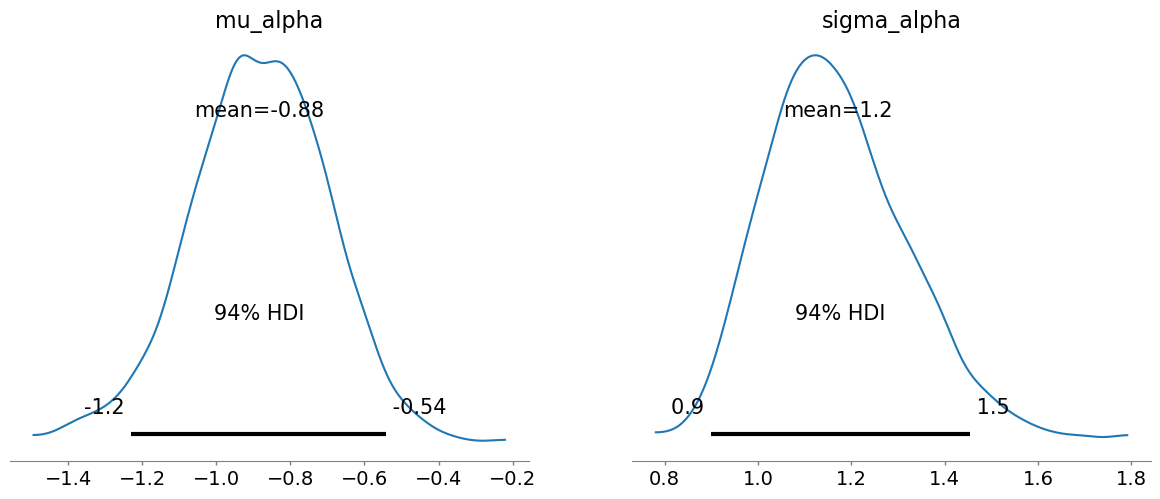

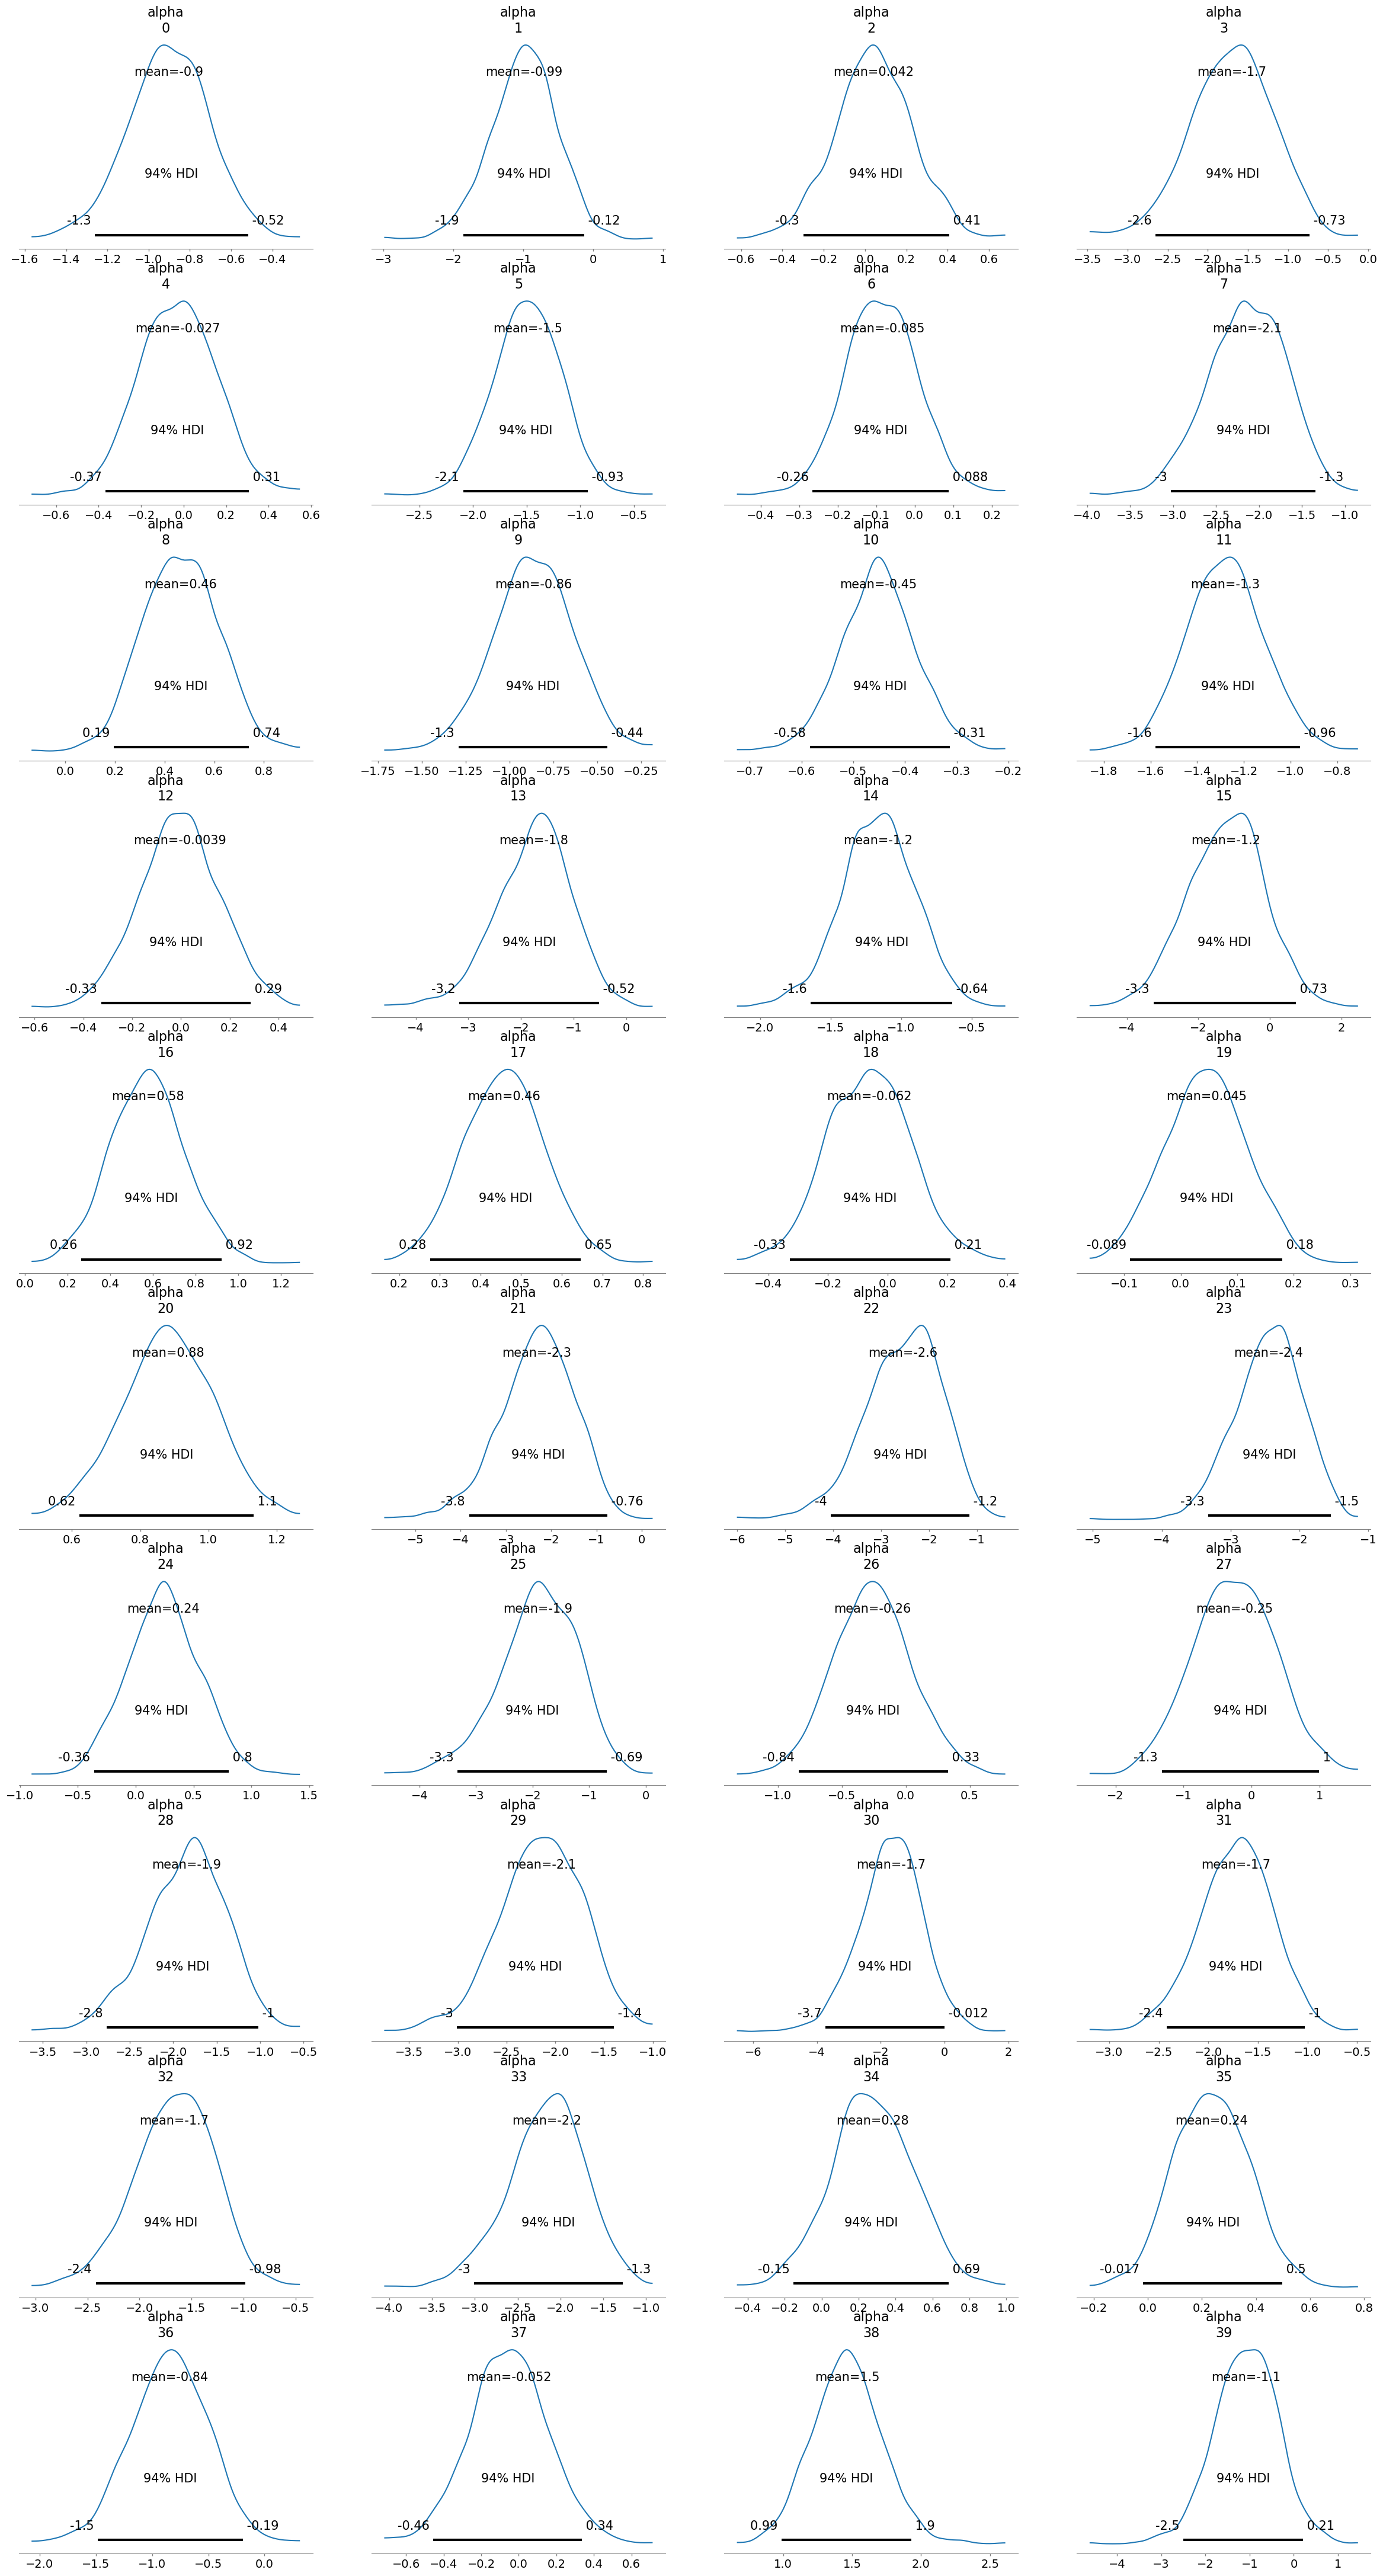

In [21]:

import pymc as pm
import pandas as pd
import numpy as np

# Load your CSV
df = pd.read_csv("drone_airspace_data.csv")

# Create binary target: 1 if sighting is in Class B airspace, 0 otherwise
def classify_in_class_b(x):
    if isinstance(x, str) and 'CLASS B' in x:
        return 1
    else:
        return 0

df['in_class_b'] = df['airspace_name'].apply(classify_in_class_b)

# Factorize states into integer codes
state_codes, state_uniques = pd.factorize(df['state'])

# Build the hierarchical model
with pm.Model() as hierarchical_model:
    # Global (population-level) priors
    mu_alpha = pm.Normal('mu_alpha', mu=0, sigma=5)  # global mean log-odds
    sigma_alpha = pm.HalfNormal('sigma_alpha', sigma=5)  # group spread

    # State-specific intercepts
    alpha = pm.Normal('alpha', mu=mu_alpha, sigma=sigma_alpha, shape=len(state_uniques))

    # Logistic probability for each sighting
    p = pm.Deterministic('p', pm.math.sigmoid(alpha[state_codes]))

    # Likelihood
    observed = pm.Bernoulli('observed', p=p, observed=df['in_class_b'])

    # Sampling
    trace = pm.sample(1000, tune=1000, target_accept=0.9, chains=2, cores=1)

# Summarize results
summary = pm.summary(trace, var_names=["mu_alpha", "sigma_alpha", "alpha"])
print(summary)

# Plot posterior distributions
pm.plot_posterior(trace, var_names=["mu_alpha", "sigma_alpha"], hdi_prob=0.94)

# Optional: Plot state-specific alphas
pm.plot_posterior(trace, var_names=["alpha"], hdi_prob=0.94)


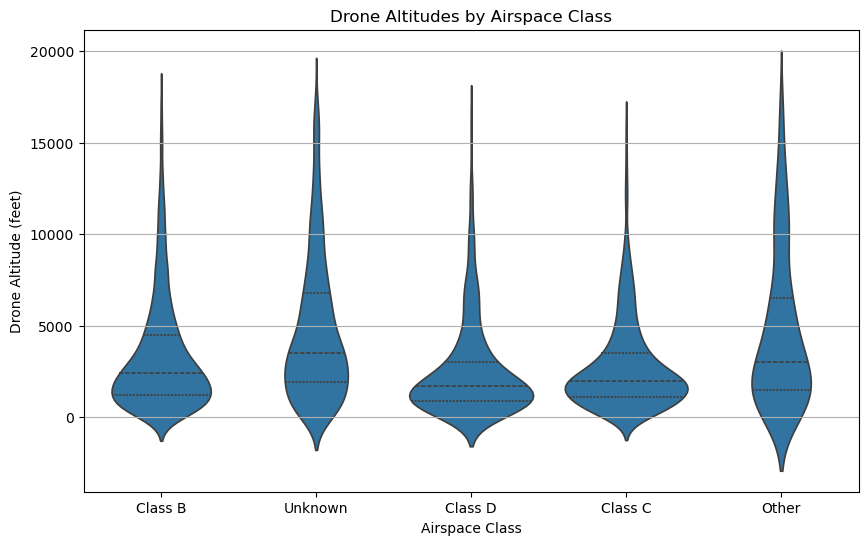

In [5]:
# If you haven't already, map airspace names into simple classes
def classify_airspace(x):
    if isinstance(x, str):
        if 'CLASS B' in x:
            return 'Class B'
        elif 'CLASS C' in x:
            return 'Class C'
        elif 'CLASS D' in x:
            return 'Class D'
        else:
            return 'Other'
    else:
        return 'Unknown'

df['airspace_class'] = df['airspace_name'].apply(classify_airspace)


# Drop rows with missing or invalid altitudes
df_clean = df.dropna(subset=['drone_altitude_ft'])

# Optional: filter out crazy high values (e.g., > 20,000 ft)
df_clean = df_clean[df_clean['drone_altitude_ft'] < 20000]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_clean, x='airspace_class', y='drone_altitude_ft', inner='quartile')
plt.title('Drone Altitudes by Airspace Class')
plt.xlabel('Airspace Class')
plt.ylabel('Drone Altitude (feet)')
plt.grid(True, axis='y')
plt.show()


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu, sigma]


/Users/vishalivallioor/anaconda3/envs/pymc_env/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


array([[<Axes: title={'center': 'mu\n0'}>,
        <Axes: title={'center': 'mu\n1'}>,
        <Axes: title={'center': 'mu\n2'}>],
       [<Axes: title={'center': 'mu\n3'}>,
        <Axes: title={'center': 'mu\n4'}>, <Axes: >]], dtype=object)

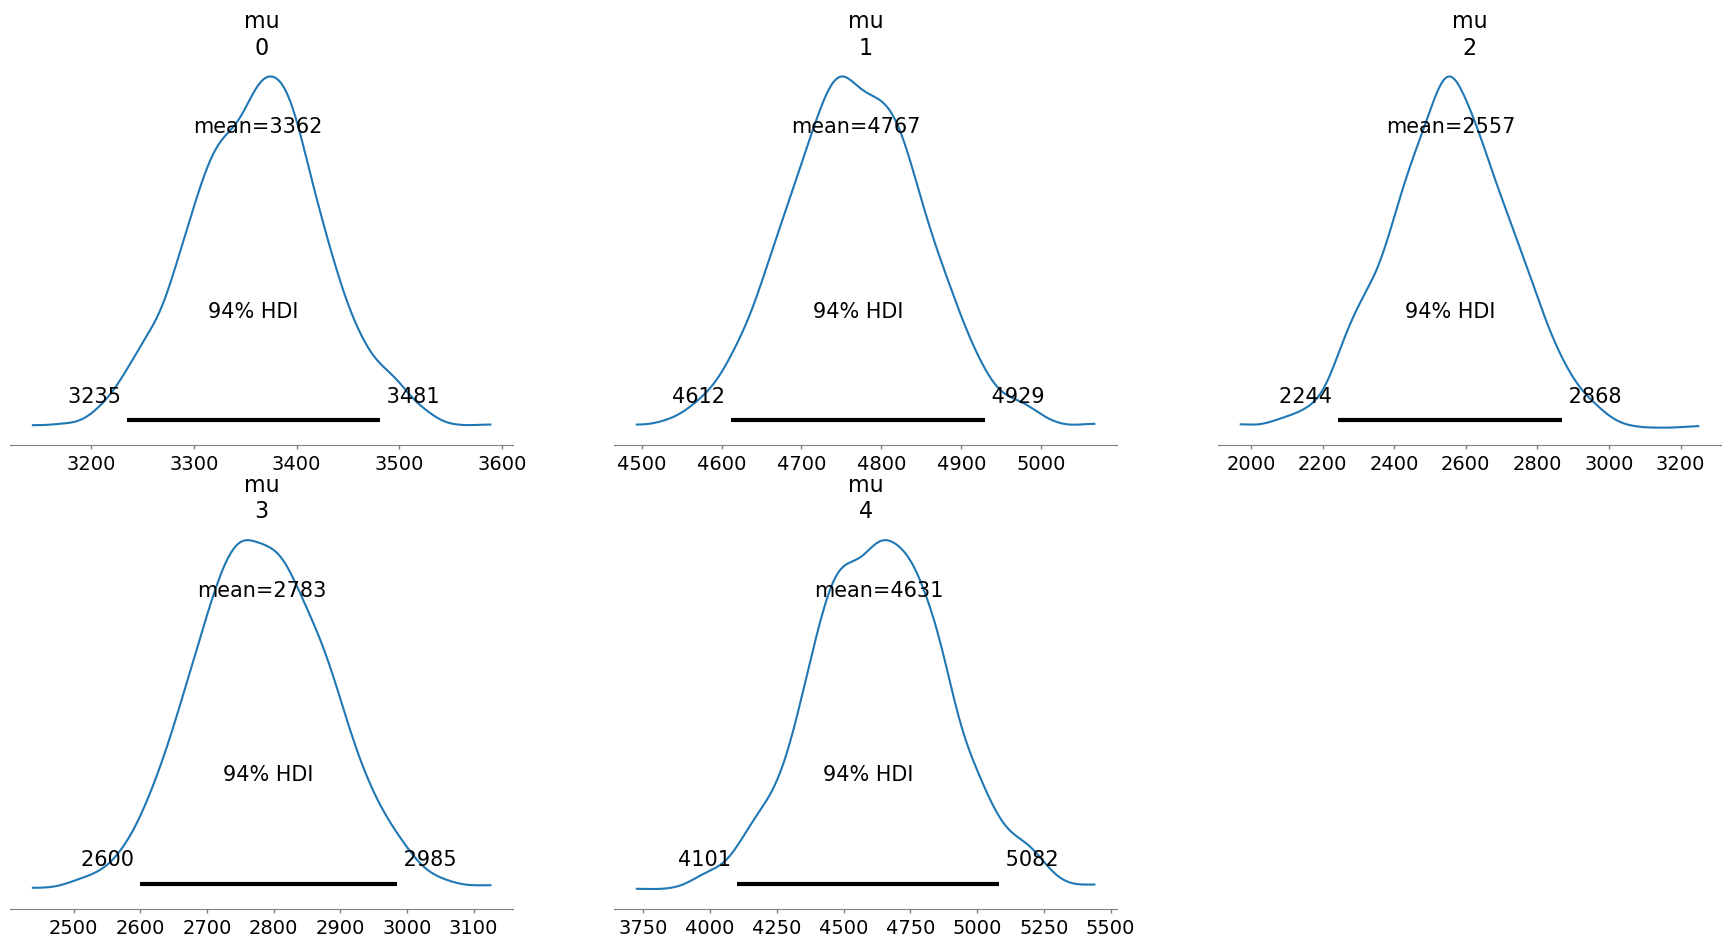

In [6]:
import pymc as pm

# Assume df_clean['airspace_class'] and df_clean['drone_altitude_ft'] are ready
class_codes, class_names = pd.factorize(df_clean['airspace_class'])

with pm.Model() as altitude_model:
    # Priors
    mu = pm.Normal('mu', mu=400, sigma=5000, shape=len(class_names))  # One mean per airspace class
    sigma = pm.HalfNormal('sigma', sigma=2000)

    # Likelihood
    observed = pm.Normal('observed', mu=mu[class_codes], sigma=sigma, observed=df_clean['drone_altitude_ft'])

    # Sampling
    trace_altitude = pm.sample(1000, tune=1000, chains=2)

# Summarize results
import arviz as az
az.summary(trace_altitude, var_names=['mu'])
pm.plot_posterior(trace_altitude, var_names=['mu'])


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, beta]


/Users/vishalivallioor/anaconda3/envs/pymc_env/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 0 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha  1.507  0.245   1.083    1.967      0.011    0.008     532.0     493.0   
beta   6.569  1.221   4.291    8.732      0.051    0.038     578.0     520.0   

       r_hat  
alpha    1.0  
beta     1.0  


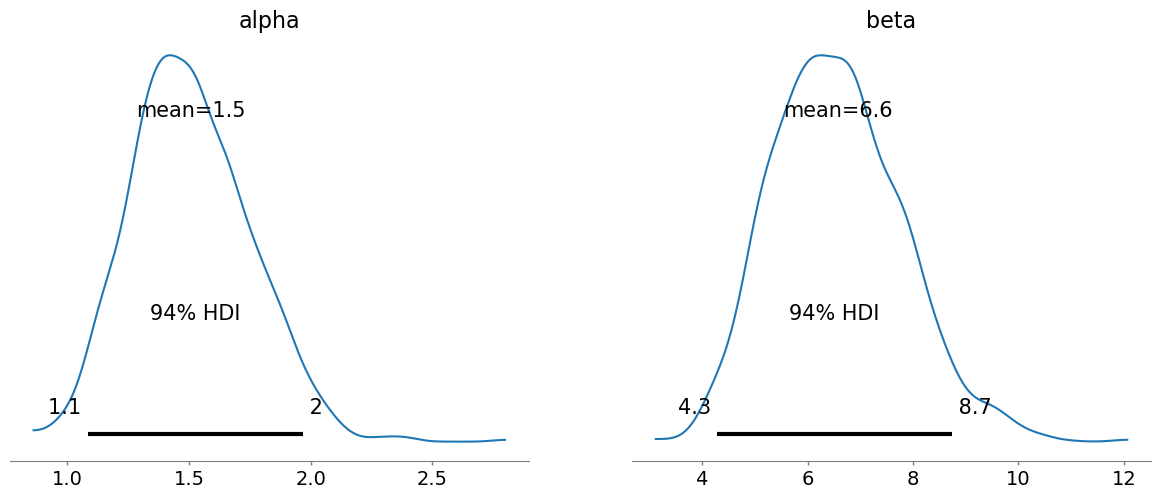

In [16]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# --- Fit Beta model ---
with pm.Model() as beta_model:
    alpha = pm.HalfNormal('alpha', sigma=10)
    beta = pm.HalfNormal('beta', sigma=10)
    
    probs = pm.Beta('probs', alpha=alpha, beta=beta, observed=state_probs)
    
    trace_beta = pm.sample(1000, tune=1000, chains=2, target_accept=0.95)

# --- Summarize ---
summary = az.summary(trace_beta, var_names=['alpha', 'beta'])
print(summary)

# --- Plot posterior distributions ---
pm.plot_posterior(trace_beta, var_names=['alpha', 'beta'])
plt.show()


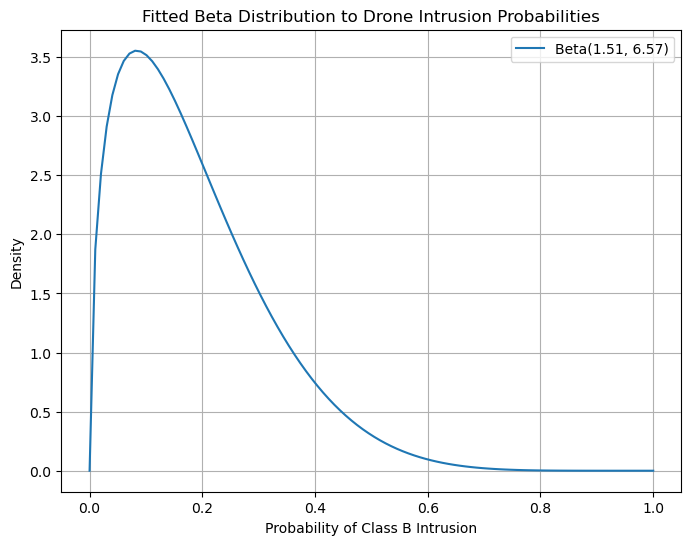

In [17]:
# Extract mean alpha and beta from the trace
alpha_mean = trace_beta.posterior['alpha'].mean().values
beta_mean = trace_beta.posterior['beta'].mean().values

# Plot the fitted Beta distribution
x = np.linspace(0, 1, 100)
y = stats.beta.pdf(x, alpha_mean, beta_mean)

plt.figure(figsize=(8,6))
plt.plot(x, y, label=f"Beta({alpha_mean:.2f}, {beta_mean:.2f})")
plt.title('Fitted Beta Distribution to Drone Intrusion Probabilities')
plt.xlabel('Probability of Class B Intrusion')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()


In [21]:
from scipy.stats import ks_2samp

# Run KS Test
ks_statistic, p_value = ks_2samp(simulated_probs, state_probs)

print(f"KS Statistic: {ks_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")


KS Statistic: 0.1351
P-Value: 0.2041


In [19]:
ppc

Inference data with groups:
	> posterior_predictive
	> observed_data

Sampling: [probs]


/Users/vishalivallioor/anaconda3/envs/pymc_env/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

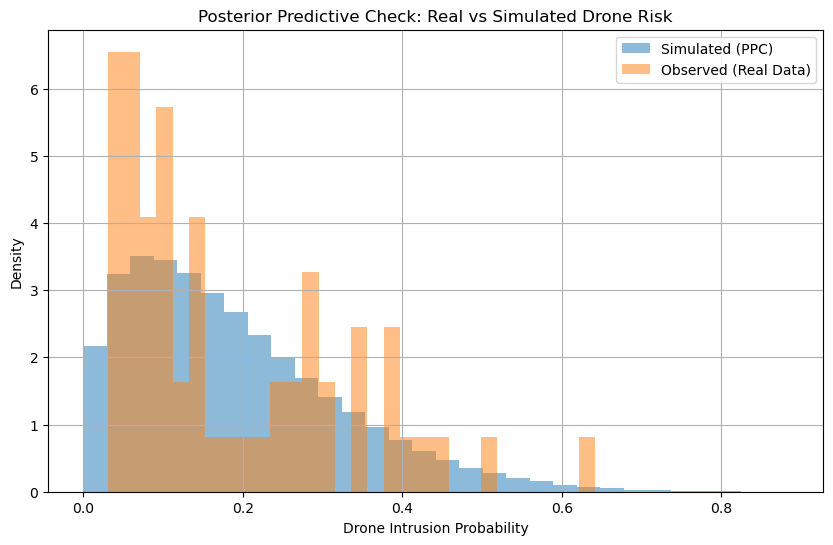

In [20]:
# Import if needed
import pymc as pm

# Generate fake probabilities from the posterior
with beta_model:
    ppc = pm.sample_posterior_predictive(trace_beta, var_names=['probs'], random_seed=42)

simulated_probs = ppc.posterior_predictive['probs'].values.flatten()

plt.figure(figsize=(10,6))
plt.hist(simulated_probs, bins=30, density=True, alpha=0.5, label='Simulated (PPC)')
plt.hist(state_probs, bins=30, density=True, alpha=0.5, label='Observed (Real Data)')
plt.xlabel('Drone Intrusion Probability')
plt.ylabel('Density')
plt.title('Posterior Predictive Check: Real vs Simulated Drone Risk')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [7]:
summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_alpha,-0.886,0.185,-1.232,-0.542,0.004,0.005,2644.0,1724.0,1.0
sigma_alpha,1.174,0.157,0.898,1.462,0.004,0.003,1303.0,1263.0,1.0
alpha[0],-0.910,0.198,-1.277,-0.537,0.003,0.005,3465.0,1481.0,1.0
alpha[1],-0.984,0.492,-1.893,-0.044,0.008,0.013,3890.0,1269.0,1.0
alpha[2],0.047,0.189,-0.297,0.405,0.003,0.005,3822.0,1374.0,1.0
...,...,...,...,...,...,...,...,...,...
alpha[55],-2.055,0.892,-3.778,-0.440,0.017,0.028,3275.0,1347.0,1.0
alpha[56],-1.221,1.053,-3.117,0.664,0.018,0.030,3541.0,1253.0,1.0
alpha[57],-1.264,1.117,-3.199,1.008,0.017,0.030,4242.0,1442.0,1.0
alpha[58],-1.254,1.084,-3.417,0.696,0.018,0.026,3698.0,1482.0,1.0


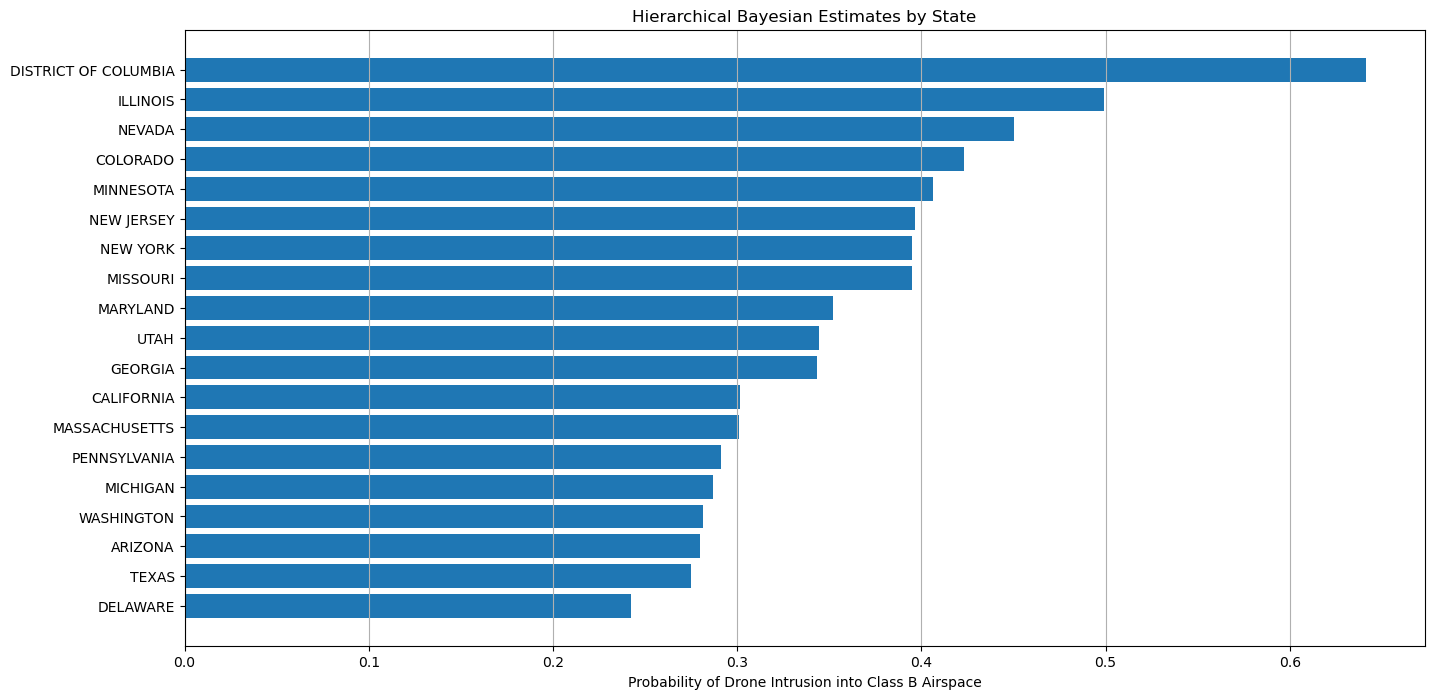

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have this from your model:
# trace = your pymc trace
# state_uniques = your list of state names in order

# Logistic function to convert log-odds to probability
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Extract mean of mu_alpha and alpha[i] from posterior
mu_alpha_mean = trace.posterior['mu_alpha'].mean().values
alpha_means = trace.posterior['alpha'].mean(dim=("chain", "draw")).values

# Calculate final probability for each state
state_probs = logistic(mu_alpha_mean + alpha_means)

# Create a nice DataFrame
state_probs_df = pd.DataFrame({
    'state': state_uniques,
    'intrusion_probability': state_probs
})

# Sort by highest probability
state_probs_df = state_probs_df.sort_values(by='intrusion_probability', ascending=False)

# List of accepted U.S. states and DC
valid_states = [
    'ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO', 
    'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA', 'FLORIDA', 'GEORGIA', 
    'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 
    'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 
    'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE', 
    'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 
    'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'RHODE ISLAND', 
    'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 
    'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING'
]

# Keep only valid rows
state_probs_df = state_probs_df.head(20)
state_probs_df  = state_probs_df[state_probs_df['state'].isin(valid_states)]

# Plot
plt.figure(figsize=(16, 8))
plt.barh(state_probs_df['state'], state_probs_df['intrusion_probability'])
plt.xlabel('Probability of Drone Intrusion into Class B Airspace')
plt.title('Hierarchical Bayesian Estimates by State')
plt.gca().invert_yaxis()  # So highest is on top
plt.grid(True, axis='x')
plt.show()


In [53]:
import os
os.getcwd()

'/Users/vishalivallioor/Desktop/drone_intrusion/drone-intrusion'

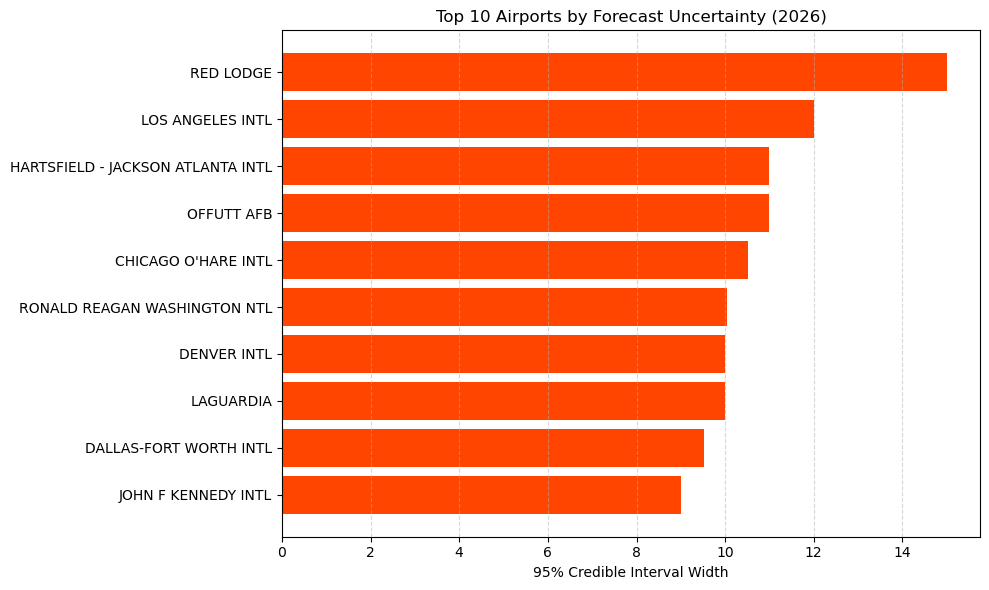

In [55]:
import matplotlib.pyplot as plt

forecast_df["CI_width"] = forecast_df["upper_95_CI"] - forecast_df["lower_95_CI"]
top_uncertain = forecast_df[forecast_df["year"] == 2026].sort_values("CI_width", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_uncertain["airport"], top_uncertain["CI_width"], color='orangered')
plt.xlabel("95% Credible Interval Width")
plt.title("Top 10 Airports by Forecast Uncertainty (2026)")
plt.gca().invert_yaxis()
plt.grid(True, axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# TRUE PER YEAR poisson

df_clean["year"] = pd.to_datetime(df_clean["date_of_sighting"]).dt.year

class_b_intrusions = df_clean[df_clean["airspace_class"] == "Class B"]

intrusion_counts_by_year = (
    class_b_intrusions.groupby(["Facility Name", "year"])
    .size()
    .reset_index(name="intrusion_count")
)

airport_codes, airport_uniques = pd.factorize(intrusion_counts_by_year["Facility Name"])
year_codes, year_uniques = pd.factorize(intrusion_counts_by_year["year"])

import pymc as pm

with pm.Model() as airport_year_model:
    # Global priors
    mu_lambda = pm.Exponential("mu_lambda", lam=1)
    sigma_lambda = pm.HalfNormal("sigma_lambda", sigma=1)

    # Airport-level varying intercept
    alpha_airport = pm.Normal("alpha_airport", mu=0, sigma=sigma_lambda, shape=len(airport_uniques))
    
    # Year-level effect (optional)
    alpha_year = pm.Normal("alpha_year", mu=0, sigma=1, shape=len(year_uniques))
    
    # Log-rate for each observation
    log_lambda = mu_lambda + alpha_airport[airport_codes] + alpha_year[year_codes]
    
    # Convert to rate
    lambda_obs = pm.Deterministic("lambda_obs", pm.math.exp(log_lambda))
    
    # Likelihood
    observed_counts = intrusion_counts_by_year["intrusion_count"].values
    obs = pm.Poisson("obs", mu=lambda_obs, observed=observed_counts)

    # Sample
    trace = pm.sample(1000, tune=1000, target_accept=0.95, chains=2)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu_lambda, sigma_lambda, alpha_airport, alpha_year]


/Users/vishalivallioor/anaconda3/envs/pymc_env/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 11 seconds.
There were 62 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


In [10]:
import arviz as az

summary = az.summary(trace, var_names=["mu_lambda", "sigma_lambda", "alpha_airport", "alpha_year", "lambda_obs"])
print(summary)


                   mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
mu_lambda         0.391  0.240   0.004    0.802      0.014    0.007     336.0   
sigma_lambda      0.887  0.061   0.775    0.999      0.002    0.001     995.0   
alpha_airport[0] -0.173  0.410  -0.960    0.575      0.008    0.009    2787.0   
alpha_airport[1] -0.243  0.617  -1.424    0.870      0.010    0.017    3645.0   
alpha_airport[2]  0.051  0.311  -0.552    0.602      0.007    0.008    1850.0   
...                 ...    ...     ...      ...        ...      ...       ...   
lambda_obs[559]   2.146  0.665   0.981    3.381      0.014    0.017    2018.0   
lambda_obs[560]   1.536  0.477   0.712    2.403      0.008    0.013    3618.0   
lambda_obs[561]   1.977  0.612   0.966    3.145      0.010    0.016    3615.0   
lambda_obs[562]   2.640  0.817   1.236    4.151      0.013    0.022    3558.0   
lambda_obs[563]   2.840  0.877   1.379    4.567      0.015    0.023    3480.0   

                  ess_tail 

In [ ]:
lambda_means = trace.posterior["lambda_obs"].mean(dim=("chain", "draw")).values

# Add back to your intrusion_counts_by_year
intrusion_counts_by_year["estimated_lambda"] = lambda_means

# Sort to find high-risk locations
high_risk = intrusion_counts_by_year.sort_values(by="estimated_lambda", ascending=False)
print(high_risk.head(10))

                         Facility Name  year  intrusion_count  \
65                 CHICAGO O'HARE INTL  2024               47   
64                 CHICAGO O'HARE INTL  2023               28   
283                   LOS ANGELES INTL  2024               36   
63                 CHICAGO O'HARE INTL  2022               30   
282                   LOS ANGELES INTL  2023               23   
208  HARTSFIELD - JACKSON ATLANTA INTL  2024               37   
122                        DENVER INTL  2024               23   
281                   LOS ANGELES INTL  2022               38   
207  HARTSFIELD - JACKSON ATLANTA INTL  2023               29   
121                        DENVER INTL  2023               26   

     estimated_lambda  
65          36.847982  
64          33.792952  
283         32.169379  
63          31.406383  
282         29.493683  
208         28.598362  
122         27.431508  
281         27.413009  
207         26.223167  
121         25.149965  


In [26]:
from itertools import product
import pandas as pd
import pymc as pm
import numpy as np

# Step 1: Define range from actual data up to 2028 (forecast)
airports = df_clean["Facility Name"].unique()
years = list(range(df_clean["year"].min(), 2029))  # 2028 inclusive

# Step 2: Full airport-year grid
full_grid = pd.DataFrame(product(airports, years), columns=["Facility Name", "year"])

# Step 3: Merge observed intrusion counts
intrusion_counts_by_year = (
    df_clean[df_clean["year"] < 2025]  # REMOVE 2025
    .groupby(["Facility Name", "year"])
    .size()
    .reset_index(name="intrusion_count")
)

merged = full_grid.merge(intrusion_counts_by_year, on=["Facility Name", "year"], how="left").fillna({"intrusion_count": 0})

# Step 4: Encode variables
airport_codes, airport_uniques = pd.factorize(merged["Facility Name"])
year_idx = merged["year"] - merged["year"].min()  # numeric trend
counts = merged["intrusion_count"].values

# Step 5: Bayesian model with trend
with pm.Model() as airport_forecast_model:
    mu_lambda = pm.Normal("mu_lambda", mu=0, sigma=2)
    sigma_airport = pm.HalfNormal("sigma_airport", sigma=1)
    beta_year = pm.Normal("beta_year", mu=0, sigma=1)

    alpha_airport = pm.Normal("alpha_airport", mu=0, sigma=sigma_airport, shape=len(airport_uniques))

    log_lambda = mu_lambda + alpha_airport[airport_codes] + beta_year * year_idx
    lambda_obs = pm.Deterministic("lambda_obs", pm.math.exp(log_lambda))

    pm.Poisson("obs", mu=lambda_obs, observed=counts)

    trace = pm.sample(1000, tune=1000, target_accept=0.95)

# Step 6: Extract predictions
lambda_post = trace.posterior["lambda_obs"].mean(dim=("chain", "draw")).values
merged["predicted_lambda"] = lambda_post

# Step 7: Forecast results for 2026–2028
forecast = merged[merged["year"].isin([2026, 2027, 2028])]
forecast_sorted = forecast.sort_values(by="predicted_lambda", ascending=False)
print(forecast_sorted.head(10))



Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_lambda, sigma_airport, beta_year, alpha_airport]


/Users/vishalivallioor/anaconda3/envs/pymc_env/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


                          Facility Name  year  intrusion_count  \
937                           RED LODGE  2026              0.0   
938                           RED LODGE  2027              0.0   
939                           RED LODGE  2028              0.0   
767                    LOS ANGELES INTL  2026              0.0   
1297                CHICAGO O'HARE INTL  2026              0.0   
768                    LOS ANGELES INTL  2027              0.0   
1298                CHICAGO O'HARE INTL  2027              0.0   
1947                         OFFUTT AFB  2026              0.0   
1427  HARTSFIELD - JACKSON ATLANTA INTL  2026              0.0   
2067                        DENVER INTL  2026              0.0   

      predicted_lambda  
937          13.349582  
938          11.347554  
939           9.646034  
767           9.170968  
1297          8.753070  
768           7.795666  
1298          7.440520  
1947          7.142404  
1427          7.140612  
2067          7.091446 

In [62]:
df 

,date_of_sighting,state,city,summary,drone_latitude,drone_longitude,drone_altitude_ft,Facility Name,Facility Type,Time,Time_UTC,index_right,airspace_name,min_altitude,max_altitude,airspace_class,in_class_b
0,2022-04-21,TENNESSEE,NASHVILLE,"PRELIM INFO FROM FAA OPS: NASHVILLE, TN/UAS IN...",39.977773,-104.436100,4000,LAND,AIRPORT,1205C,2022-04-21 18:05:00,77.0,DENVER CLASS B AREA F,3657.6,3657.6,B,1
1,2022-05-10,RHODE ISLAND,PAWTUCKET,"PRELIM INFO FROM FAA OPS: PAWTUCKET, RI/UAS IN...",39.711361,-104.990678,4000,DENVER HEALTH,HELIPORT,1933E,2022-05-11 00:33:00,76.0,DENVER CLASS B AREA E,3657.6,3657.6,B,1
2,2022-05-13,MASSACHUSETTS,BEDFORD,"PRELIM INFO FROM FAA OPS: BEDFORD, MA/UAS INCI...",39.995252,-86.251405,1500,INDIANAPOLIS EXEC,AIRPORT,1356E,2022-05-13 18:56:00,NaN,NaN,NaN,NaN,NaN,0
3,2022-05-15,WEST VIRGINIA,HUNTINGTON,"PRELIM INFO FROM FAA OPS: HUNTINGTON, WV/UAS I...",25.873983,-80.278222,500,MIAMI-OPA LOCKA EXEC,AIRPORT,1145E,2022-05-15 16:45:00,165.0,MIAMI CLASS B AREA D,2133.6,2133.6,B,1
4,2022-05-28,MICHIGAN,HOLLAND,"PRELIM INFO FROM FAA OPS: HOLLAND, MI/UAS INCI...",36.905655,-121.531299,2500,MONTEREY BAY ACADEMY,AIRPORT,1025E,2022-05-28 15:25:00,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5471,2019-12-30,TEXAS,DALLAS,"PRELIM INFO FROM FAA OPS: DALLAS, TX/UAS INCID...",32.797036,-97.037695,250,DALLAS-FORT WORTH INTL,AIRPORT,1736C,2019-12-30 23:36:00,57.0,DALLAS CLASS B AREA A,3352.8,3352.8,B,1
5472,2019-12-30,TEXAS,DALLAS,"PRELIM INFO FROM FAA OPS: DALLAS, TX/UAS INCID...",34.494572,-82.648889,3000,ANDERSON RGNL,AIRPORT,1346C,2019-12-30 19:46:00,NaN,NaN,NaN,NaN,NaN,0
5473,2019-12-31,FLORIDA,MIAMI,"PRELIM INFO FROM FAA OPS: MIAMI, FL/UAS INCIDE...",34.481803,-82.746634,1000,ANDERSON RGNL,AIRPORT,1811E,2019-12-31 23:11:00,NaN,NaN,NaN,NaN,NaN,0
5474,2019-12-31,FLORIDA,WEST PALM BEACH,"PRELIM INFO FROM FAA OPS: WEST PALM BEACH, FL/...",26.683160,-80.114199,400,PALM BEACH INTL,AIRPORT,1800E,2019-12-31 23:00:00,582.0,PALM BEACH INTL AIRPORT CLASS C AREA A,1219.2,1219.2,C,0


In [61]:
df_clean 

,date_of_sighting,state,city,summary,drone_latitude,drone_longitude,drone_altitude_ft,Facility Name,Facility Type,Time,Time_UTC,index_right,airspace_name,min_altitude,max_altitude,airspace_class,in_class_b,year
0,2022-04-21,TENNESSEE,NASHVILLE,"PRELIM INFO FROM FAA OPS: NASHVILLE, TN/UAS IN...",39.977773,-104.436100,4000,LAND,AIRPORT,1205C,2022-04-21 18:05:00,77.0,DENVER CLASS B AREA F,3657.6,3657.6,Class B,1,2022
1,2022-05-10,RHODE ISLAND,PAWTUCKET,"PRELIM INFO FROM FAA OPS: PAWTUCKET, RI/UAS IN...",39.711361,-104.990678,4000,DENVER HEALTH,HELIPORT,1933E,2022-05-11 00:33:00,76.0,DENVER CLASS B AREA E,3657.6,3657.6,Class B,1,2022
2,2022-05-13,MASSACHUSETTS,BEDFORD,"PRELIM INFO FROM FAA OPS: BEDFORD, MA/UAS INCI...",39.995252,-86.251405,1500,INDIANAPOLIS EXEC,AIRPORT,1356E,2022-05-13 18:56:00,NaN,NaN,NaN,NaN,Unknown,0,2022
3,2022-05-15,WEST VIRGINIA,HUNTINGTON,"PRELIM INFO FROM FAA OPS: HUNTINGTON, WV/UAS I...",25.873983,-80.278222,500,MIAMI-OPA LOCKA EXEC,AIRPORT,1145E,2022-05-15 16:45:00,165.0,MIAMI CLASS B AREA D,2133.6,2133.6,Class B,1,2022
4,2022-05-28,MICHIGAN,HOLLAND,"PRELIM INFO FROM FAA OPS: HOLLAND, MI/UAS INCI...",36.905655,-121.531299,2500,MONTEREY BAY ACADEMY,AIRPORT,1025E,2022-05-28 15:25:00,NaN,NaN,NaN,NaN,Unknown,0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5471,2019-12-30,TEXAS,DALLAS,"PRELIM INFO FROM FAA OPS: DALLAS, TX/UAS INCID...",32.797036,-97.037695,250,DALLAS-FORT WORTH INTL,AIRPORT,1736C,2019-12-30 23:36:00,57.0,DALLAS CLASS B AREA A,3352.8,3352.8,Class B,1,2019
5472,2019-12-30,TEXAS,DALLAS,"PRELIM INFO FROM FAA OPS: DALLAS, TX/UAS INCID...",34.494572,-82.648889,3000,ANDERSON RGNL,AIRPORT,1346C,2019-12-30 19:46:00,NaN,NaN,NaN,NaN,Unknown,0,2019
5473,2019-12-31,FLORIDA,MIAMI,"PRELIM INFO FROM FAA OPS: MIAMI, FL/UAS INCIDE...",34.481803,-82.746634,1000,ANDERSON RGNL,AIRPORT,1811E,2019-12-31 23:11:00,NaN,NaN,NaN,NaN,Unknown,0,2019
5474,2019-12-31,FLORIDA,WEST PALM BEACH,"PRELIM INFO FROM FAA OPS: WEST PALM BEACH, FL/...",26.683160,-80.114199,400,PALM BEACH INTL,AIRPORT,1800E,2019-12-31 23:00:00,582.0,PALM BEACH INTL AIRPORT CLASS C AREA A,1219.2,1219.2,Class C,0,2019


In [31]:
# Limit to fewer airports to speed up
airports = df_clean["Facility Name"].unique()
years = list(range(df_clean["year"].min(), 2029))

# Full grid
full_grid = pd.DataFrame(product(airports, years), columns=["Facility Name", "year"])

# Aggregate intrusions, exclude 2025
intrusion_counts_by_year = (
    df_clean[df_clean["year"] < 2025]
    .groupby(["Facility Name", "year"])
    .size()
    .reset_index(name="intrusion_count")
)

merged = full_grid.merge(intrusion_counts_by_year, on=["Facility Name", "year"], how="left").fillna({"intrusion_count": 0})

# Factorize
airport_codes, airport_uniques = pd.factorize(merged["Facility Name"])
year_idx = (merged["year"] - merged["year"].min()).values
counts = merged["intrusion_count"].values

# Run smaller model
with pm.Model() as model:
    mu_lambda = pm.Normal("mu_lambda", mu=0, sigma=2)
    sigma_airport = pm.HalfNormal("sigma_airport", sigma=1)
    beta_year = pm.Normal("beta_year", mu=0, sigma=1)

    alpha_airport = pm.Normal("alpha_airport", mu=0, sigma=sigma_airport, shape=len(airport_uniques))

    log_lambda = mu_lambda + alpha_airport[airport_codes] + beta_year * year_idx
    lambda_obs = pm.Deterministic("lambda_obs", pm.math.exp(log_lambda))

    obs = pm.Poisson("obs", mu=lambda_obs, observed=counts)

    trace = pm.sample(300, tune=300, chains=1, target_accept=0.9, progressbar=True)

# Posterior predictive
with model:
    pp_samples = pm.sample_posterior_predictive(trace, var_names=["obs"])

# Extract credible interval
target_airport = "CHICAGO O'HARE INTL"
target_year = 2026
target_idx = merged[(merged["Facility Name"] == target_airport) & (merged["year"] == target_year)].index[0]

samples = pp_samples["obs"][:, target_idx]
lower, upper = np.percentile(samples, [2.5, 97.5])
mean = np.mean(samples)

print(f"{target_airport} ({target_year}) — Mean: {mean:.2f}, 95% CI: [{lower:.0f}, {upper:.0f}]")


Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mu_lambda, sigma_airport, beta_year, alpha_airport]


/Users/vishalivallioor/anaconda3/envs/pymc_env/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 1 chain for 300 tune and 300 draw iterations (300 + 300 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: [obs]


/Users/vishalivallioor/anaconda3/envs/pymc_env/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

KeyError: 'obs'

In [32]:
# Extract lambda for all samples and the specific row
lambda_samples = trace.posterior["lambda_obs"].stack(draws=("chain", "draw")).values  # shape: (n_rows, n_draws)

# Get index of your target airport-year
match = merged[(merged["Facility Name"] == target_airport) & (merged["year"] == target_year)]

if len(match) == 0:
    print(f"No matching data found for {target_airport} in {target_year}.")
else:
    target_idx = match.index[0]
    
    # Get lambda samples for that row
    lambda_target = lambda_samples[target_idx, :]
    
    # Simulate Poisson draws
    samples = np.random.poisson(lam=lambda_target)
    
    # Compute CI
    lower, upper = np.percentile(samples, [2.5, 97.5])
    mean = np.mean(samples)

    print(f"{target_airport} ({target_year}) — Mean: {mean:.2f}, 95% CI: [{lower:.0f}, {upper:.0f}]")


CHICAGO O'HARE INTL (2026) — Mean: 8.95, 95% CI: [4, 15]


In [34]:
# Generate credible intervals for all U.S. airports in the forecasted years
target_years = [2026, 2027, 2028]
results = []

# Extract posterior lambda samples
lambda_samples = trace.posterior["lambda_obs"].stack(draws=("chain", "draw")).values

# Filter forecast rows
forecast_rows = merged[merged["year"].isin(target_years)]

# Iterate through each (airport, year) row
for idx, row in forecast_rows.iterrows():
    airport = row["Facility Name"]
    year = row["year"]
    
    lam_samples = lambda_samples[idx, :]
    predicted_counts = np.random.poisson(lam_samples)
    
    lower = np.percentile(predicted_counts, 2.5)
    upper = np.percentile(predicted_counts, 97.5)
    mean = np.mean(predicted_counts)

    results.append({
        "airport": airport,
        "year": year,
        "mean_prediction": round(mean, 2),
        "lower_95_CI": round(lower, 2),
        "upper_95_CI": round(upper, 2)
    })

forecast_df = pd.DataFrame(results).sort_values(by="mean_prediction", ascending=False)

forecast_df

,airport,year,mean_prediction,lower_95_CI,upper_95_CI
279,RED LODGE,2026,13.39,6.0,21.00
280,RED LODGE,2027,10.95,5.0,18.00
281,RED LODGE,2028,9.59,4.0,16.52
228,LOS ANGELES INTL,2026,9.38,4.0,16.00
387,CHICAGO O'HARE INTL,2026,8.47,4.0,14.52
...,...,...,...,...,...
1783,HILO INTL,2027,0.03,0.0,1.00
1796,HERLONG RECREATIONAL,2028,0.03,0.0,0.52
2270,NANWALEK,2028,0.03,0.0,1.00
1797,SALISBURY-OCEAN CITY WICOMICO RGNL,2026,0.02,0.0,0.00


In [60]:
forecast_df[(forecast_df["year"] == 2027)].sort_values(by="lower_95_CI", ascending=False).head(50)

,airport,year,mean_prediction,lower_95_CI,upper_95_CI,CI_width
280,RED LODGE,2027,10.95,5.00,18.00,13.00
388,CHICAGO O'HARE INTL,2027,7.29,3.00,13.00,10.00
229,LOS ANGELES INTL,2027,7.78,3.00,14.52,11.52
619,DENVER INTL,2027,6.01,2.00,11.00,9.00
427,HARTSFIELD - JACKSON ATLANTA INTL,2027,5.93,2.00,11.00,9.00
583,OFFUTT AFB,2027,5.83,2.00,10.00,8.00
385,DALLAS-FORT WORTH INTL,2027,5.14,1.48,10.00,8.52
283,FORT LAUDERDALE/HOLLYWOOD INTL,2027,4.46,1.00,9.00,8.00
358,HARRY REID INTL,2027,4.12,1.00,9.00,8.00
334,ANDERSON RGNL,2027,3.55,1.00,7.52,6.52


In [58]:
forecast_df[(forecast_df["year"] == 2026)].sort_values(by="lower_95_CI", ascending=False).head(50)

,airport,year,mean_prediction,lower_95_CI,upper_95_CI,CI_width
279,RED LODGE,2026,13.39,6.00,21.00,15.00
387,CHICAGO O'HARE INTL,2026,8.47,4.00,14.52,10.52
228,LOS ANGELES INTL,2026,9.38,4.00,16.00,12.00
618,DENVER INTL,2026,7.25,3.00,13.00,10.00
426,HARTSFIELD - JACKSON ATLANTA INTL,2026,7.20,2.00,13.00,11.00
582,OFFUTT AFB,2026,6.96,2.00,13.00,11.00
384,DALLAS-FORT WORTH INTL,2026,6.15,2.00,11.52,9.52
342,RONALD REAGAN WASHINGTON NTL,2026,6.35,1.48,11.52,10.04
153,LAGUARDIA,2026,5.76,1.00,11.00,10.00
357,HARRY REID INTL,2026,4.75,1.00,9.52,8.52


In [25]:
forecast = merged[merged["year"].isin([2023])]
forecast_sorted = forecast.sort_values(by="predicted_lambda", ascending=False)
print(forecast_sorted.head(10))

                          Facility Name  year  intrusion_count  \
1036                CHICAGO O'HARE INTL  2023             28.0   
612                    LOS ANGELES INTL  2023             23.0   
1652                        DENVER INTL  2023             26.0   
1140  HARTSFIELD - JACKSON ATLANTA INTL  2023             29.0   
1028             DALLAS-FORT WORTH INTL  2023             23.0   
916        RONALD REAGAN WASHINGTON NTL  2023             25.0   
412                           LAGUARDIA  2023             35.0   
956                     HARRY REID INTL  2023             15.0   
1148                JOHN F KENNEDY INTL  2023             18.0   
828                      SAN DIEGO INTL  2023              7.0   

      estimated_lambda  predicted_lambda  
1036         33.792952         33.786993  
612          29.493683         30.932608  
1652         25.149965         26.480769  
1140         26.223167         26.276644  
1028         22.127342         23.277402  
916          21

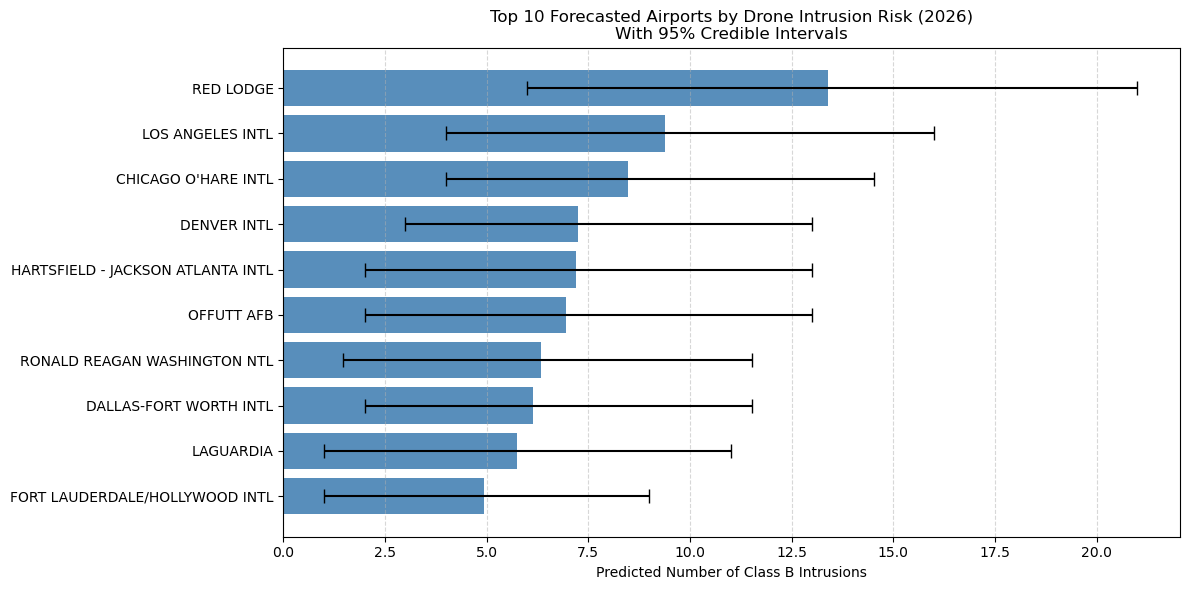

In [38]:
import matplotlib.pyplot as plt

# Filter to top 10 by mean prediction for 2026
top_2026 = forecast_df[forecast_df["year"] == 2026].sort_values(by="mean_prediction", ascending=False).head(10)

# Compute error bars
lower_error = top_2026["mean_prediction"] - top_2026["lower_95_CI"]
upper_error = top_2026["upper_95_CI"] - top_2026["mean_prediction"]
error_bars = [lower_error.values, upper_error.values]

# Plot
plt.figure(figsize=(12, 6))
plt.barh(
    top_2026["airport"],
    top_2026["mean_prediction"],
    xerr=error_bars,
    capsize=5,
    color='steelblue',
    alpha=0.9
)

plt.xlabel("Predicted Number of Class B Intrusions")
plt.title("Top 10 Forecasted Airports by Drone Intrusion Risk (2026)\nWith 95% Credible Intervals")
plt.gca().invert_yaxis()
plt.grid(True, axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


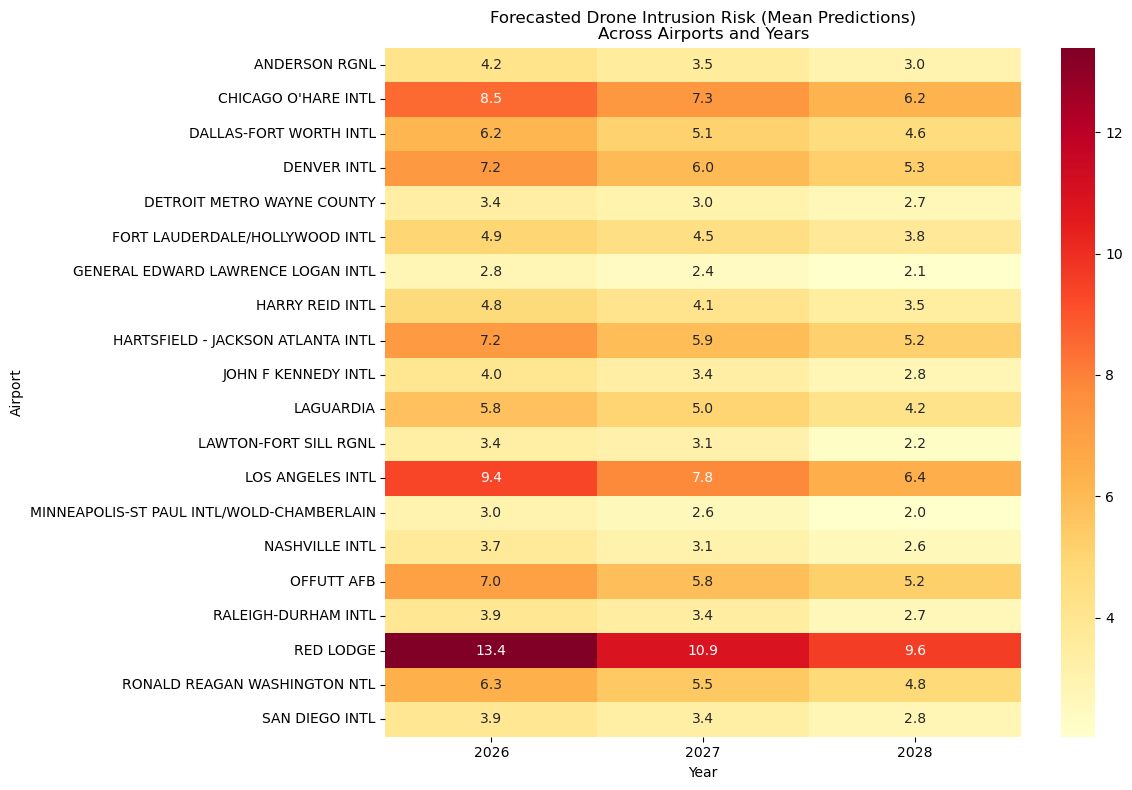

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
top_airports = (
    forecast_df[forecast_df["year"].isin([2026, 2027, 2028])]
    .groupby("airport")["mean_prediction"]
    .mean()
    .sort_values(ascending=False)
    .head(20)
    .index
)

heatmap_data = (
    forecast_df[forecast_df["airport"].isin(top_airports)]
    .pivot(index="airport", columns="year", values="mean_prediction")
    .fillna(0)
)


plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Forecasted Drone Intrusion Risk (Mean Predictions)\nAcross Airports and Years")
plt.xlabel("Year")
plt.ylabel("Airport")
plt.tight_layout()
plt.show()



Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lambda_airport]


/Users/vishalivallioor/anaconda3/envs/pymc_env/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
/Users/vishalivallioor/anaconda3/envs/pymc_env/lib/python3.12/site-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (172) in plot_posterior, generating only 40 plots
  warnings.warn(


array([[<Axes: title={'center': 'lambda_airport\n0'}>,
        <Axes: title={'center': 'lambda_airport\n1'}>,
        <Axes: title={'center': 'lambda_airport\n2'}>,
        <Axes: title={'center': 'lambda_airport\n3'}>],
       [<Axes: title={'center': 'lambda_airport\n4'}>,
        <Axes: title={'center': 'lambda_airport\n5'}>,
        <Axes: title={'center': 'lambda_airport\n6'}>,
        <Axes: title={'center': 'lambda_airport\n7'}>],
       [<Axes: title={'center': 'lambda_airport\n8'}>,
        <Axes: title={'center': 'lambda_airport\n9'}>,
        <Axes: title={'center': 'lambda_airport\n10'}>,
        <Axes: title={'center': 'lambda_airport\n11'}>],
       [<Axes: title={'center': 'lambda_airport\n12'}>,
        <Axes: title={'center': 'lambda_airport\n13'}>,
        <Axes: title={'center': 'lambda_airport\n14'}>,
        <Axes: title={'center': 'lambda_airport\n15'}>],
       [<Axes: title={'center': 'lambda_airport\n16'}>,
        <Axes: title={'center': 'lambda_airport\n17'}>

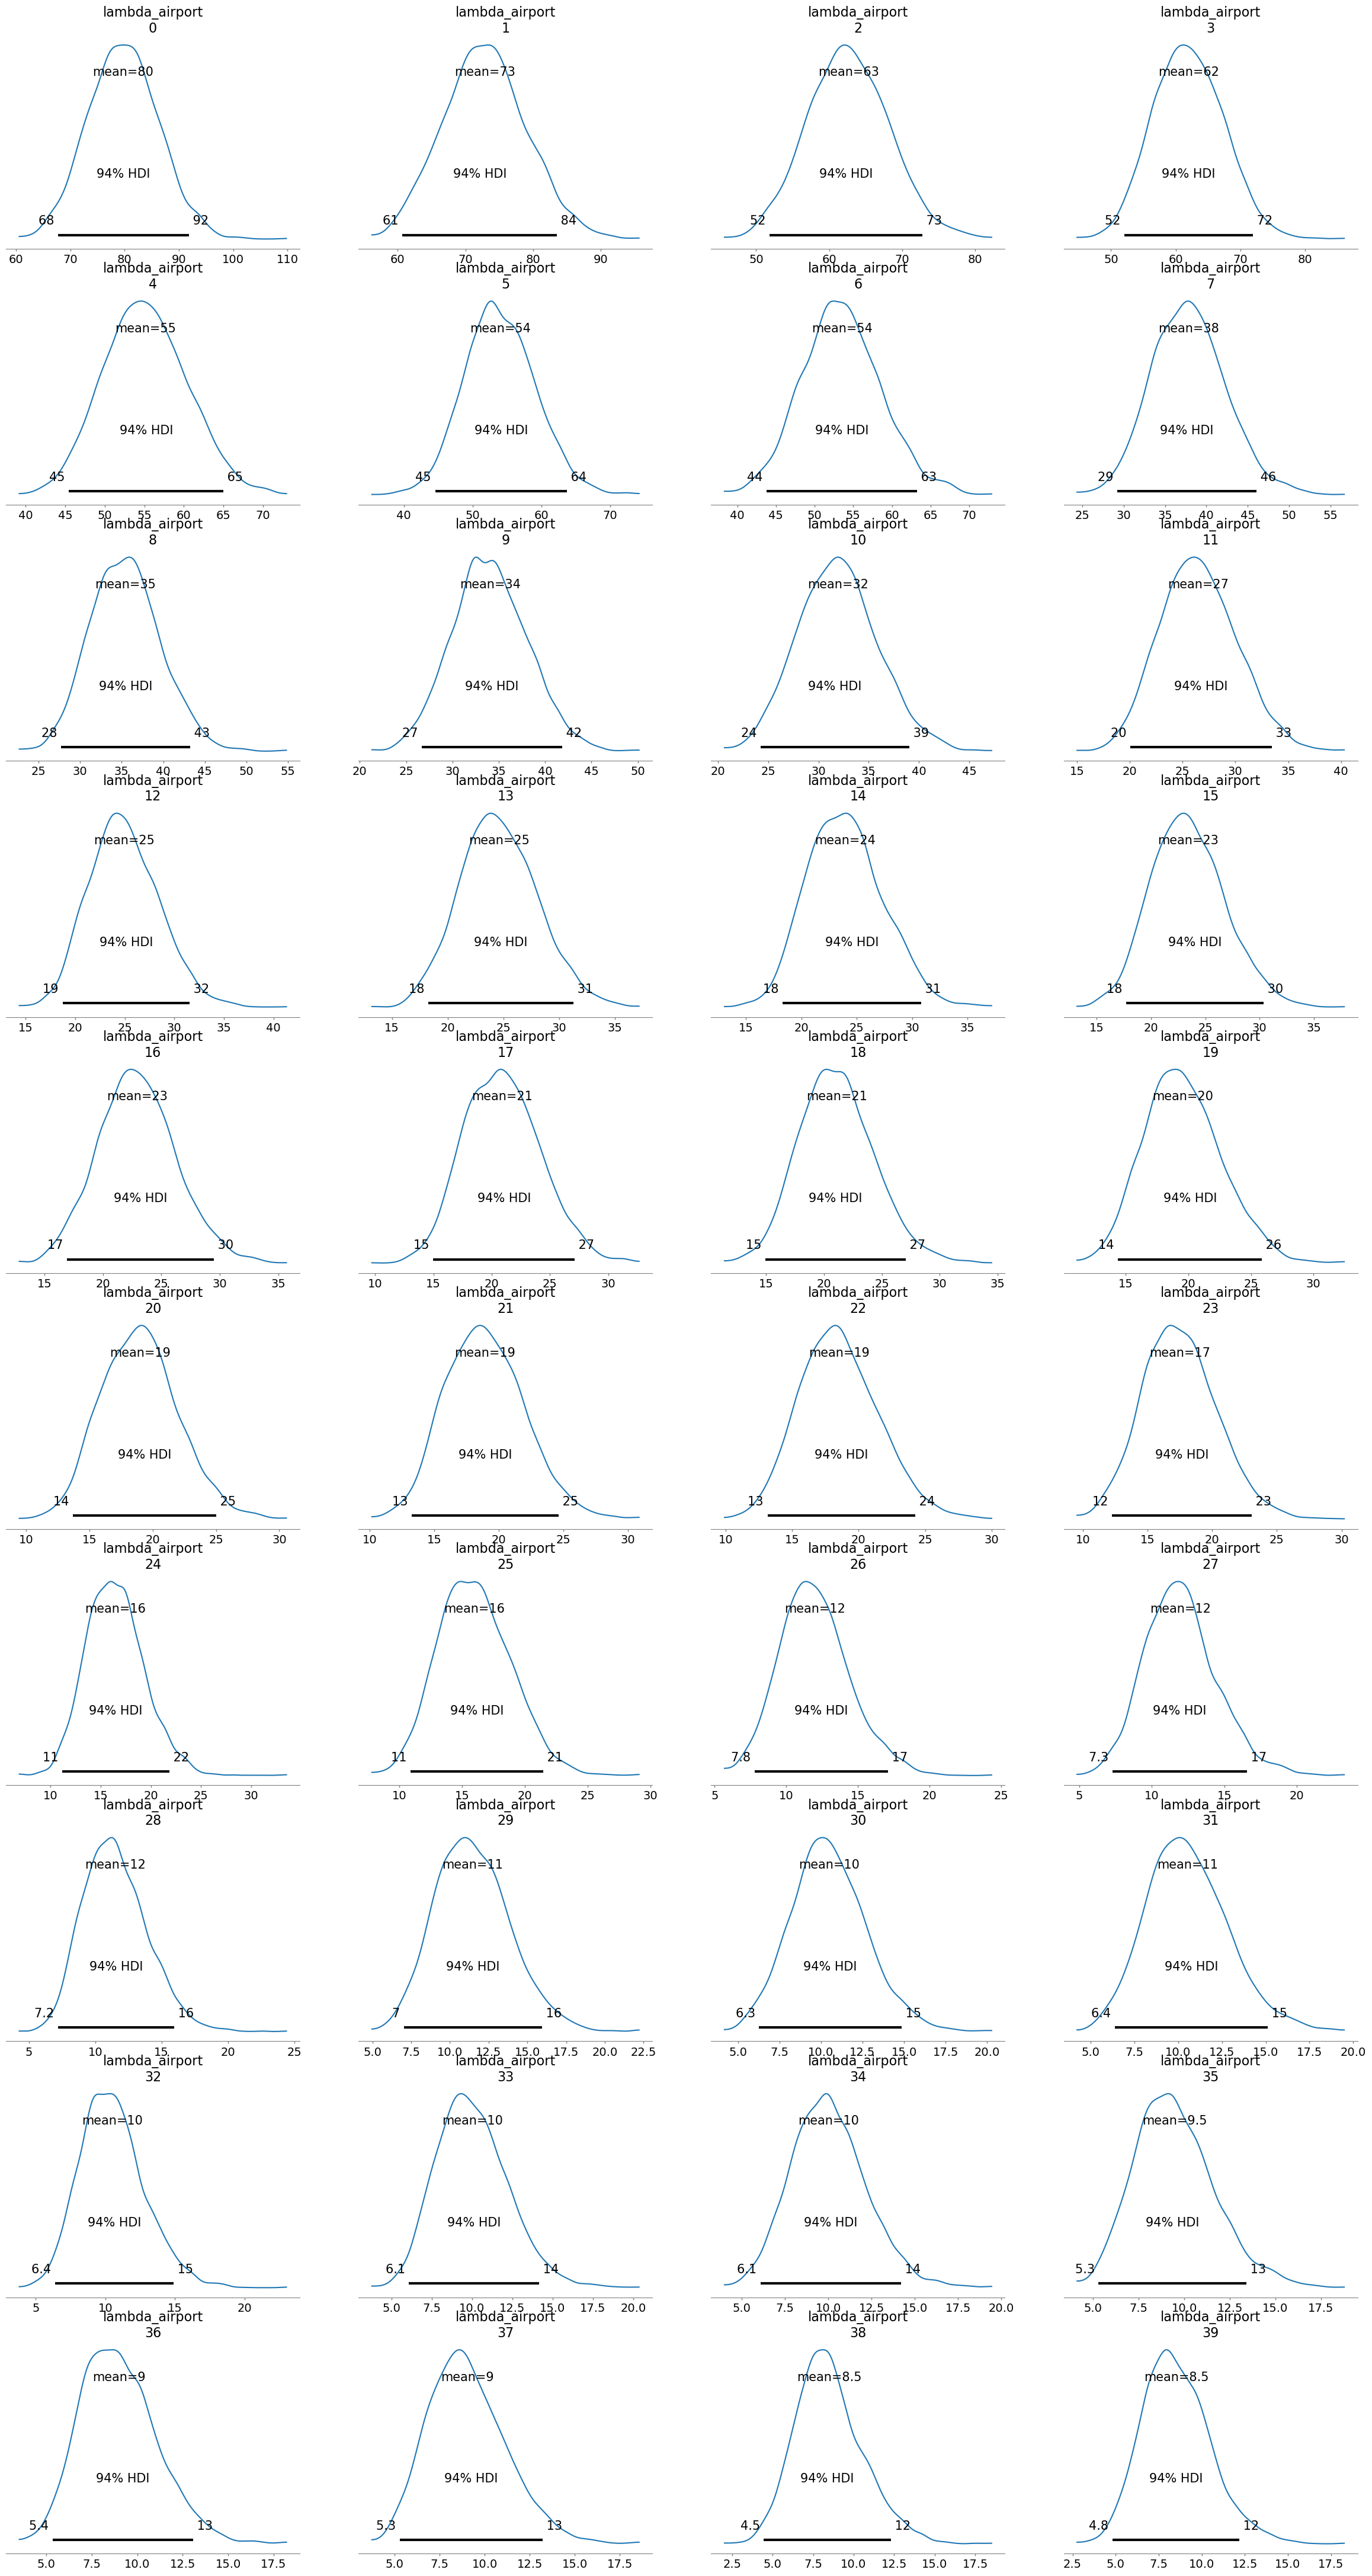

In [15]:
high_risk_intrusions = df_clean[df_clean['airspace_class'] == 'Class B']

high_risk_counts = high_risk_intrusions.groupby('Facility Name').size().sort_values(ascending=False)

import pymc as pm
import numpy as np

# Example intrusion counts
# Replace this with your high_risk_counts.values
intrusion_counts = high_risk_counts.values

with pm.Model() as airport_risk_model:
    # Prior for risk at each airport
    lambda_airport = pm.Exponential('lambda_airport', lam=1, shape=len(intrusion_counts))
    
    # Likelihood
    observations = pm.Poisson('observations', mu=lambda_airport, observed=intrusion_counts)
    
    # Inference
    trace_airport = pm.sample(1000, tune=1000, chains=4, target_accept=0.95)

import arviz as az
az.summary(trace_airport, var_names=['lambda_airport'])
pm.plot_posterior(trace_airport, var_names=['lambda_airport'])

In [24]:
az.summary(trace_airport, var_names=['lambda_airport'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
lambda_airport[0],79.553,6.256,68.444,91.633,0.091,0.098,4722.0,3110.0,1.0
lambda_airport[1],73.077,6.050,61.474,84.371,0.081,0.113,5490.0,2797.0,1.0
lambda_airport[2],62.361,5.557,52.243,72.819,0.082,0.086,4577.0,3115.0,1.0
lambda_airport[3],62.020,5.486,52.000,72.380,0.083,0.088,4360.0,2499.0,1.0
lambda_airport[4],55.094,5.233,45.615,64.892,0.074,0.079,4991.0,3403.0,1.0
...,...,...,...,...,...,...,...,...,...
lambda_airport[167],1.003,0.706,0.053,2.293,0.010,0.014,3760.0,2431.0,1.0
lambda_airport[168],1.006,0.702,0.020,2.296,0.011,0.013,2905.0,1679.0,1.0
lambda_airport[169],1.009,0.700,0.040,2.235,0.010,0.015,3354.0,1961.0,1.0
lambda_airport[170],0.999,0.686,0.046,2.211,0.010,0.014,3703.0,2238.0,1.0


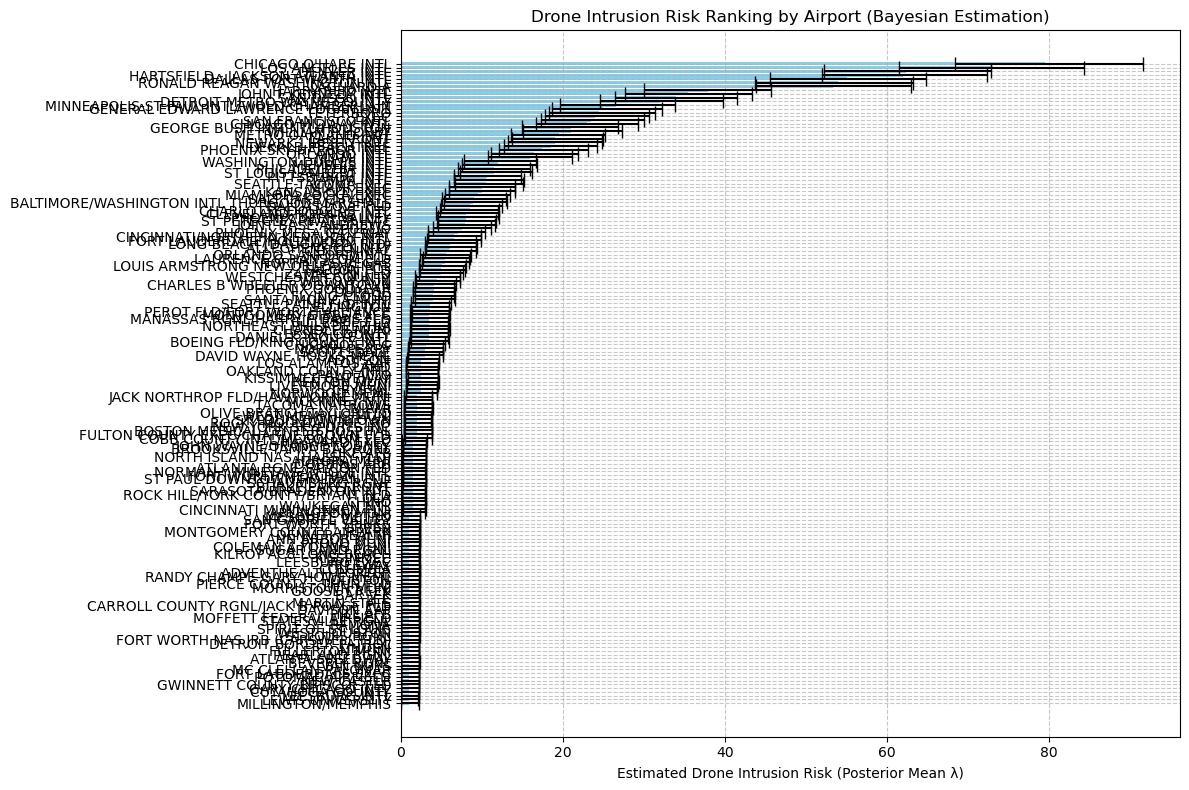

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Extract airport names and drone counts
high_risk_intrusions = df_clean[df_clean['airspace_class'] == 'Class B']
high_risk_counts = high_risk_intrusions.groupby('Facility Name').size().sort_values(ascending=False)

intrusion_counts = high_risk_counts.values
airport_names = high_risk_counts.index.to_list()

# Step 2: After Bayesian inference
posterior_means = az.summary(trace_airport, var_names=['lambda_airport'])['mean'].values
hdi_lower = az.summary(trace_airport, var_names=['lambda_airport'])['hdi_3%'].values
hdi_upper = az.summary(trace_airport, var_names=['lambda_airport'])['hdi_97%'].values

# Step 3: Sort everything descending by posterior mean
sorted_indices = np.argsort(posterior_means)[::-1]

airport_names_sorted = np.array(airport_names)[sorted_indices]
posterior_means_sorted = posterior_means[sorted_indices]
hdi_lower_sorted = hdi_lower[sorted_indices]
hdi_upper_sorted = hdi_upper[sorted_indices]

# Step 4: Calculate error bars
lower_error = posterior_means_sorted - hdi_lower_sorted
upper_error = hdi_upper_sorted - posterior_means_sorted
error = np.vstack((lower_error, upper_error))

# Step 5: Plot
plt.figure(figsize=(12,8))
plt.barh(airport_names_sorted, posterior_means_sorted, xerr=error, align='center', color='skyblue', ecolor='black', capsize=5)
plt.xlabel('Estimated Drone Intrusion Risk (Posterior Mean λ)')
plt.title('Drone Intrusion Risk Ranking by Airport (Bayesian Estimation)')
plt.gca().invert_yaxis()  # Highest risk on top
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.show()

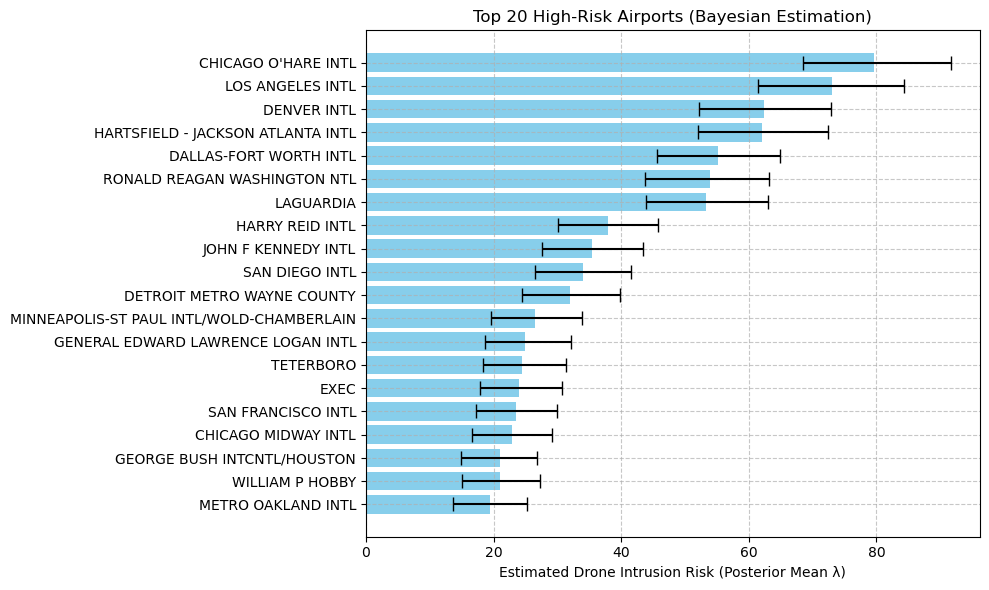

In [27]:
# Choose Top N Airports
N = 20

airport_names_top = airport_names_sorted[:N]
posterior_means_top = posterior_means_sorted[:N]
lower_error_top = lower_error[:N]
upper_error_top = upper_error[:N]
error_top = np.vstack((lower_error_top, upper_error_top))

# Plot Top N
plt.figure(figsize=(10,6))
plt.barh(airport_names_top, posterior_means_top, xerr=error_top, align='center', color='skyblue', ecolor='black', capsize=5)
plt.xlabel('Estimated Drone Intrusion Risk (Posterior Mean λ)')
plt.title('Top 20 High-Risk Airports (Bayesian Estimation)')
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# STATE SPECIFIC

import pymc as pm
import pandas as pd
import numpy as np

# Load your CSV
df = pd.read_csv("drone_airspace_data.csv")

# Create binary target: 1 if sighting is in Class B airspace, 0 otherwise
def classify_in_class_b(x):
    if isinstance(x, str) and 'CLASS B' in x:
        return 1
    else:
        return 0

df['in_class_b'] = df['airspace_name'].apply(classify_in_class_b)

# Factorize states into integer codes
state_codes, state_uniques = pd.factorize(df['state'])

# Build the hierarchical model
with pm.Model() as hierarchical_model:
    # Global (population-level) priors
    mu_alpha = pm.Normal('mu_alpha', mu=0, sigma=5)  # global mean log-odds
    sigma_alpha = pm.HalfNormal('sigma_alpha', sigma=5)  # group spread

    # State-specific intercepts
    alpha = pm.Normal('alpha', mu=mu_alpha, sigma=sigma_alpha, shape=len(state_uniques))

    # Logistic probability for each sighting
    p = pm.Deterministic('p', pm.math.sigmoid(alpha[state_codes]))

    # Likelihood
    observed = pm.Bernoulli('observed', p=p, observed=df['in_class_b'])

    # Sampling
    trace = pm.sample(1000, tune=1000, target_accept=0.9, chains=2, cores=1)

# Summarize results
summary = pm.summary(trace, var_names=["mu_alpha", "sigma_alpha", "alpha"])
print(summary)

# Plot posterior distributions
pm.plot_posterior(trace, var_names=["mu_alpha", "sigma_alpha"], hdi_prob=0.94)

# Optional: Plot state-specific alphas
pm.plot_posterior(trace, var_names=["alpha"], hdi_prob=0.94)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have this from your model:
# trace = your pymc trace
# state_uniques = your list of state names in order

# Logistic function to convert log-odds to probability
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Extract mean of mu_alpha and alpha[i] from posterior
mu_alpha_mean = trace.posterior['mu_alpha'].mean().values
alpha_means = trace.posterior['alpha'].mean(dim=("chain", "draw")).values

# Calculate final probability for each state
state_probs = logistic(mu_alpha_mean + alpha_means)

# Create a nice DataFrame
state_probs_df = pd.DataFrame({
    'state': state_uniques,
    'intrusion_probability': state_probs
})

# Sort by highest probability
state_probs_df = state_probs_df.sort_values(by='intrusion_probability', ascending=False)

# List of accepted U.S. states and DC
valid_states = [
    'ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO', 
    'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA', 'FLORIDA', 'GEORGIA', 
    'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 
    'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 
    'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE', 
    'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 
    'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'RHODE ISLAND', 
    'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 
    'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING'
]

# Keep only valid rows
state_probs_df = state_probs_df.head(20)
state_probs_df  = state_probs_df[state_probs_df['state'].isin(valid_states)]

# Plot
plt.figure(figsize=(16, 8))
plt.barh(state_probs_df['state'], state_probs_df['intrusion_probability'])
plt.xlabel('Probability of Drone Intrusion into Class B Airspace')
plt.title('Hierarchical Bayesian Estimates by State')
plt.gca().invert_yaxis()  # So highest is on top
plt.grid(True, axis='x')
plt.show()
